In [1]:
import os
import time

# to convert channels to a stream
import livestreamer

# image processing
import cv2
import numpy as np

# plotting
import matplotlib.pyplot as plt
import cmocean

%matplotlib inline

# just pick up a channel of the coast
url = "http://www.ustream.tv/channel/neftehimik-azov-sea-beach"
# moves around
url = "http://www.ustream.tv/exploreSantaMonicaBeachCam"

# lousy angle, people in the way
url = "http://www.ustream.tv/channel/hollywood-beach-florida"

# surfing 
url = "https://www.youtube.com/watch?v=5JUOAFuxn-M"

# swedish company
url = "http://bambuser.com/v/5672419"
url = "http://bambuser.com/v/5688435"

# three hour beach
url = "https://www.youtube.com/watch?v=qREKP9oijWI"
url = "https://www.youtube.com/watch?v=jKCyFB5LmPo"
url = "https://www.youtube.com/watch?v=3pPkf3cPWJ4"
url = "https://www.youtube.com/watch?v=11LkixVki44"

# scheveningen live
url = 'rtmp://stream1.streamink.nl:80/live/sys1.stream'

In [2]:
# parse the streams
streams = livestreamer.streams(url)

# get the best one
stream = streams['best']
stream.params

{'rtmp': 'rtmp://stream1.streamink.nl:80/live/sys1.stream'}

In [11]:

# create an opencv capture object
cap = cv2.VideoCapture()
try:
    cap.open(stream.url)
except AttributeError:
    # url for rtmp streams (bambuser/flash)
    if 'playpath' in stream.params:
        cap.open(stream.params['rtmp'] + '/' + stream.params['playpath'])
    else:
        cap.open(stream.params['rtmp'])


In [12]:
succes, img_bgr = cap.read()
succes

True

In [13]:
# take 100 samples
N = 1000

# concatenate in an array
snaps = []
for i in range(N):
    succes, img_bgr = cap.read()
    snaps.append(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

stack = np.concatenate([x[:,:,:,np.newaxis] for x in snaps], axis=-1)

# compute min, max, mean variance
min = np.minimum.reduce(snaps)
max = np.maximum.reduce(snaps)
mean = np.mean(stack, axis=-1)
var = np.var(stack.mean(2), axis=-1)

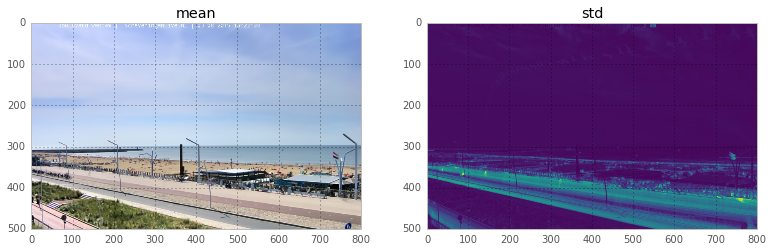

In [14]:
fig, axes = plt.subplots(1,2, figsize=(13,4))

axes[0].set_title('mean')
axes[0].imshow(mean.astype('uint8'))

axes[1].set_title('std')
axes[1].imshow(np.sqrt(var), cmap=cmocean.cm.optiond)


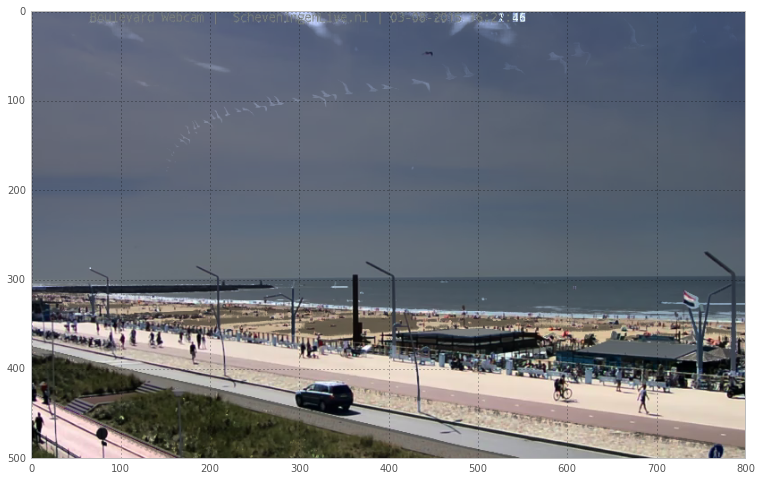

In [17]:
from IPython.html.widgets import interact
def plot(min, max):
    plt.figure(figsize=(13,8))

    plt.imshow((snaps[0] * np.maximum(np.minimum((np.tile(np.sqrt(var)[:,:,np.newaxis], 3)/10), min), max)).astype('uint8'))
interact(plot, min=(0,1.0), max=(0,1.0))

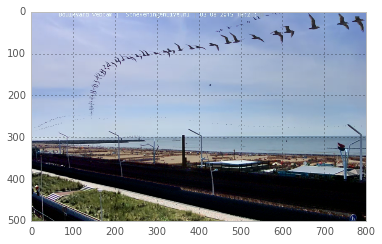

In [19]:
plt.imshow(min)